In [5]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer
import gensim
tknzr = TweetTokenizer(strip_handles=False, reduce_len=False)
wordnet_lemmatizer = WordNetLemmatizer()

In [2]:
with open('ig_corpus.txt', "r") as file:
    text = file.read()
    tokens = tknzr.tokenize(text.decode("utf-8"))

In [3]:
len(tokens)

62147318

In [6]:
word_vectors_path = "./vectors/vectors.vec"
wordvec_model = gensim.models.KeyedVectors.load_word2vec_format(word_vectors_path, binary=False)

In [8]:
from sklearn.cluster import KMeans

In [9]:
word_vectors = wordvec_model.wv.syn0

In [10]:
n_words = word_vectors.shape[0]

In [11]:
vec_size = word_vectors.shape[1]

In [12]:
n_words

210500

In [13]:
vec_size

300

In [14]:
type(word_vectors)

numpy.ndarray

In [26]:
kmeans = KMeans(n_clusters=10000, n_jobs=-1, random_state=0)

In [27]:
idx = kmeans.fit_predict(word_vectors)

KeyboardInterrupt: 

In [ ]:
word_centroid_list = list(zip(wordvec_model.wv.index2word, idx))

In [ ]:
word_centroid_list_sort = sorted(word_centroid_list, key=lambda el: el[1], reverse=False)

In [ ]:
file_out = open("clusters.txt", "w")

In [ ]:
file_out.write("WORD,CLUSTER_ID\n")

In [ ]:
for word_centroid in word_centroid_list_sort:
    line = word_centroid[0].encode("utf-8") + "," + str(word_centroid[1]) + "\n"
    file_out.write(line)
file_out.close()

In [ ]:
len(word_centroid_list_sort)

In [ ]:
word_centroid_list_sort[0]

In [183]:
def extract_hashtags(tokens):
    return [x for x in tokens if x.startswith("#")]

In [184]:
hashtags = extract_hashtags(tokens)

In [185]:
len(hashtags)

1800445

In [186]:
from collections import Counter

In [187]:
labels, values = zip(*Counter(hashtags).items())

In [188]:
values[0:10]

(2, 1, 1, 36, 1, 1, 1, 2, 1, 1)

In [189]:
filteredTags = []
filteredTagsIndices = []
threshold = 20
for i, tag in enumerate(labels):
    if values[i] > threshold:
        filteredTags.append(tag)
        filteredTagsIndices.append(i)

In [190]:
len(filteredTags)

5634

In [191]:
tagVectors = []
tags = []
tagsIndices = []
for i in range(len(filteredTags)):
    if filteredTags[i] in wordvec_model.wv.vocab:
        tagVectors.append(wordvec_model.wv[filteredTags[i]])
        tags.append(filteredTags[i])
        tagsIndices.append(filteredTagsIndices[i])

In [192]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

In [193]:
len(tagVectors)

5632

In [194]:
pca = PCA(n_components=2)
new_coordinates = pca.fit_transform(np.array(tagVectors))
new_coordinates.shape

(5632, 2)

In [195]:
new_coordinates[:,1]

array([ 1.19692838, -1.2269156 , -2.064955  , ..., -0.8990047 ,
        0.74990517, -0.38229364], dtype=float32)

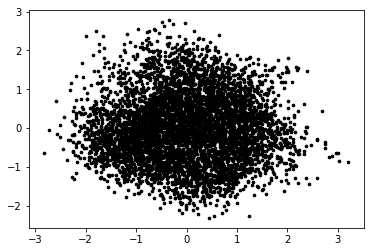

In [196]:
plt.scatter(new_coordinates[:,0], new_coordinates[:,1], c='black', s=7)

In [197]:
k = 10
# Number of clusters
kmeans = KMeans(n_clusters=k)
# Fitting the input data
kmeans = kmeans.fit(tagVectors)
# Getting the cluster labels
labels2 = kmeans.predict(tagVectors)
# Centroid values
centroids_1 = kmeans.cluster_centers_
# Project to 2D
centroids = pca.fit_transform(np.array(centroids_1))

In [198]:
# Euclidean Distance Caculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [199]:
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(new_coordinates))
for i in range(len(new_coordinates)):
        distances = dist(new_coordinates[i], centroids)
        cluster = np.argmin(distances)
        clusters[i] = cluster

In [200]:
len(clusters)

5632

In [201]:
clusters2, counts = zip(*Counter(clusters).items())

In [202]:
counts

(509, 423, 421, 548, 654, 1004, 854, 495, 383, 341)

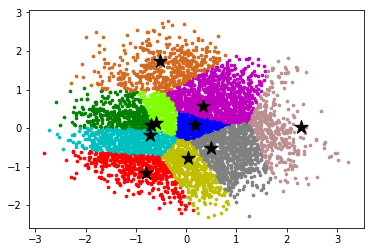

In [261]:
colors = ['r', 'g', 'b', 'y', 'c', 'm', "grey", "chocolate", "rosybrown", "chartreuse"]
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([new_coordinates[j] for j in range(len(new_coordinates)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='#050505')

In [266]:
wordIndices = []
for i in range(k):
    wordIndices.append(np.array([j for j in range(len(new_coordinates)) if clusters[j] == i]))

In [267]:
tags1 = []
for i in points1:
    tagsIndices.append(tags[i])

In [268]:
import random
len(labels2)

5632

In [279]:
#labels, values = zip(*Counter(hashtags).items())
clustersWithFreq = []
for i, cluster in enumerate(wordIndices):
    clusterWithFreq = []
    for wordI in cluster:
        count = values[tagsIndices[wordI]]
        word = labels[tagsIndices[wordI]]
        clusterWithFreq.append((word, count, i, wordI))
    clustersWithFreq
    #top = sorted(clusterWithFreq, reverse=True, key=lambda x: x[1])[:3]
    rand = random.sample(clusterWithFreq, 3)
    clustersWithFreq.append(rand)
        
#values[tagsIndices[wordIndices[0][0]]]

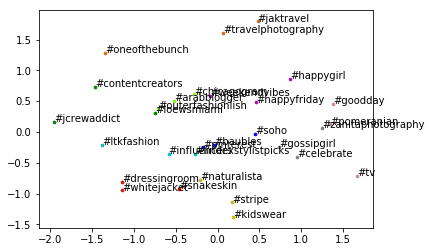

In [280]:
colors = ['r', 'g', 'b', 'y', 'c', 'm', "grey", "chocolate", "rosybrown", "chartreuse"]
fig, ax = plt.subplots()
for i in range(k):
    points = np.array([new_coordinates[x[3]] for x in clustersWithFreq[i]])
    words = np.array([x[0] for x in clustersWithFreq[i]])
    #print points
    #points = np.array([new_coordinates[j] for j in range(len(new_coordinates)) if clusters[j] == i])
    ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
    for i in range(len(points)):
        x = points[i][0]
        y = points[i][1]
        
        ax.annotate(words[i], xy=(x,y), fontsize=10)

#ax.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=100, c='#050505')

In [226]:
clustersWithFreq[0][3][3]

249

In [213]:
clustersWithFreq[1]

[(u'#wiw', 20733),
 (u'#whatiwore', 20306),
 (u'#fblogger', 13938),
 (u'#ltkunder50', 12576),
 (u'#ltkunder100', 11567),
 (u'#currentlywearing', 8562),
 (u'#styleblog', 8105),
 (u'#igstyle', 7642),
 (u'#ltksalealert', 7408),
 (u'#ltkstyletip', 7390)]

In [214]:
clustersWithFreq[2]

[(u'#liketkit', 60013),
 (u'#instagood', 6210),
 (u'#instadaily', 5007),
 (u'#ootn', 3489),
 (u'#vsco', 1693),
 (u'#sponsored', 1586),
 (u'#potd', 1575),
 (u'#tumblr', 1462),
 (u'#onebottleawayfrom', 1309),
 (u'#sunshine', 1031)]

In [215]:
clustersWithFreq[3]

[(u'#ootd', 45194),
 (u'#fashionblogger', 33181),
 (u'#style', 21429),
 (u'#outfit', 7938),
 (u'#photooftheday', 6660),
 (u'#fashionista', 5885),
 (u'#fbloggers', 4884),
 (u'#picoftheday', 3333),
 (u'#fashionstyle', 3297),
 (u'#details', 3124)]

In [216]:
clustersWithFreq[4]

[(u'#styleblogger', 20351),
 (u'#instastyle', 10586),
 (u'#styleinspo', 8165),
 (u'#wiwt', 6517),
 (u'#aboutalook', 6194),
 (u'#bloggerstyle', 6170),
 (u'#fallfashion', 5964),
 (u'#stylegram', 5691),
 (u'#mystyle', 5617),
 (u'#summerstyle', 5606)]

In [217]:
clustersWithFreq[5]

[(u'#hellolucky15', 12685),
 (u'#travel', 4936),
 (u'#hellolucky7', 2598),
 (u'#widn', 1910),
 (u'#tgif', 1860),
 (u'#california', 1641),
 (u'#sf', 1588),
 (u'#wanderlust', 1328),
 (u'#sugarplumstyle', 1227),
 (u'#sfblogger', 1200)]

104808

In [207]:
len(tagsIndices)

5632

In [208]:
len(cluster)

509

In [209]:
len(wordI)

TypeError: object of type 'numpy.int64' has no len()